# Geopandas Tutorial

The following notebook shows users how to create maps and display geospatial data using Python's "Geopandas" module. Readers should have a basic understanding of Python prior to reading the notebook. Additionally, first time "Geopandas" users may need to pip install the Geopandas module.

In [2]:
# Introduce packages and define directory
import sys
import os

import pandas as pd

import numpy as np

import geopandas
from shapely.geometry import Point

import matplotlib.pyplot as plt

chicago_dir = os.path.dirname(os.path.dirname(os.path.abspath('geopandas_tutorial.ipynb'))) + r"\geopandas_data"

Below, we will be using Chicago energy consumption data from 2010. From the City of Chicago data portal:

"Displays several units of energy consumption for households, businesses, and industries in the City of Chicago during 2010. The data was aggregated from ComEd and Peoples Natural Gas by Accenture. Electrical and gas usage data comprises 88 percent of Chicago's buildings in 2010. The electricity data comprises 68 percent of overall electrical usage in the city while gas data comprises 81 percent of all gas consumption in Chicago for 2010."

Data available at: https://data.cityofchicago.org/Environment-Sustainable-Development/Energy-Usage-2010/8yq3-m6wp

In [3]:
# Import data to be used for analysis and perform basic cleaning
energy = pd.read_csv(chicago_dir + r"\chicago_energy_2010.csv")

energy.rename(columns={'term april 2010':'therm april 2020'}, inplace=True)

energy.columns = [col.lower().replace("2010", "").strip() for col in energy.columns]

energy.head()

,community area name,census block,building type,building_subtype,kwh january,kwh february,kwh march,kwh april,kwh may,kwh june,...,total population,total units,average stories,average building age,average housesize,occupied units,occupied units percentage,renter-occupied housing units,renter-occupied housing percentage,occupied housing units
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [4]:
# Here, we keep only the data that has been aggregated to the community level and perform basic cleaning on community names
energy_comms = energy[energy['census block'].isnull()]

energy_comms = energy_comms.rename(columns={'community area name':'community'})

energy_comms['community'] = energy_comms['community'].str.lower()
energy_comms['community'] = energy_comms['community'].str.replace("'", "")

energy_comms.head()

,community,census block,building type,building_subtype,kwh january,kwh february,kwh march,kwh april,kwh may,kwh june,...,total population,total units,average stories,average building age,average housesize,occupied units,occupied units percentage,renter-occupied housing units,renter-occupied housing percentage,occupied housing units
258,albany park,NaN,NaN,NaN,2220671.0,2109977.0,2078785.0,2080695.0,2582217.0,2881111.0,...,20271.0,7713.0,1.65,66.77,678.87,6822.0,0.8845,4535.0,0.6648,6822.0
2536,archer heights,NaN,NaN,NaN,1681133.0,1537013.0,1508250.0,1604688.0,1769408.0,1983709.0,...,4055.0,1597.0,1.29,51.49,219.83,1472.0,0.9217,644.0,0.4375,1472.0
2933,armour square,NaN,NaN,NaN,1019810.0,1182215.0,1043623.0,1020908.0,1069333.0,1135115.0,...,5294.0,2468.0,1.80,36.85,165.30,2275.0,0.9218,1723.0,0.7574,2275.0
3215,ashburn,NaN,NaN,NaN,2508955.0,2667015.0,2508769.0,2639879.0,3348938.0,3448348.0,...,14401.0,5094.0,1.31,42.66,683.51,4751.0,0.9327,971.0,0.2044,4751.0
4087,auburn gresham,NaN,NaN,NaN,2098056.0,1966320.0,1846645.0,1750305.0,1950891.0,2209779.0,...,22248.0,10467.0,1.46,61.23,1148.76,8659.0,0.8273,5278.0,0.6095,8659.0


## Shapefiles
Shapefiles are a specific type of data that compiles series of geographical points called "polygons." Polygons are stored in *geometry* columns. See the table below for an example.

Polygons can be plotted out through Geopandas functions so that we may see maps of whatever area we are interested in. The following maps will look at communities within Chicago.

Shapefile data available at: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6

In [5]:
# Read in shapefile and perform basic cleaning on community names
chicago_map = geopandas.read_file(chicago_dir + r"/Boundaries - Community Areas (current)/geo_export_afe8915c-ab07-4bae-af48-b8f605c7f92f.shp")

chicago_map['community'] = chicago_map['community'].str.lower()
chicago_map['community'] = chicago_map['community'].str.replace('lake view', 'lakeview')

chicago_map.tail()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
72,0.0,74,74,0.0,0.0,mount greenwood,0.0,7.558429e+07,48665.130539,"POLYGON ((-87.69646 41.70714, -87.69644 41.706..."
73,0.0,75,75,0.0,0.0,morgan park,0.0,9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685..."
74,0.0,76,76,0.0,0.0,ohare,0.0,3.718356e+08,173625.984660,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,0.0,77,77,0.0,0.0,edgewater,0.0,4.844999e+07,31004.830946,"POLYGON ((-87.65456 41.99817, -87.65456 41.998..."
76,0.0,9,9,0.0,0.0,edison park,0.0,3.163631e+07,25937.226841,"POLYGON ((-87.80676 42.00084, -87.80676 42.000..."


In [6]:
# Merge Chicago shapefile to Chicago energy dataframe; energy_chicago is now a geopandas dataframe
energy_chicago = pd.merge(right=energy_comms, left=chicago_map, on='community', how='outer')

# Create population bins
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]
energy_chicago['pop_bins'] = pd.cut(energy_chicago['total population'], bins)

energy_chicago.head(2)

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry,...,total units,average stories,average building age,average housesize,occupied units,occupied units percentage,renter-occupied housing units,renter-occupied housing percentage,occupied housing units,pop_bins
0,0.0,35,35,0.0,0.0,douglas,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",...,4405.0,2.39,35.36,166.33,3747.0,0.8506,2559.0,0.6829,3747.0,"(0, 10000]"
1,0.0,36,36,0.0,0.0,oakland,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",...,3662.0,3.30,32.48,106.67,3165.0,0.8643,2850.0,0.9005,3165.0,"(0, 10000]"


We will now create the maps; below, before adding population data, we will simply plot a map of Chicago communities. The "plot" command automatically recognizes that *energy_chicago* is a geopandas dataframe and plots the polygon parameters found in the *geometry* column.

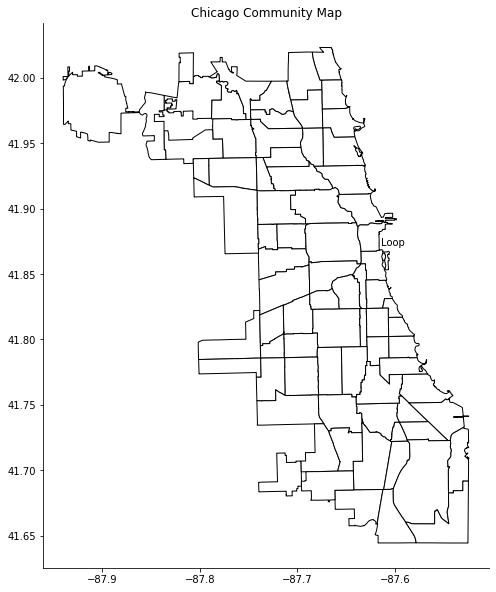

In [7]:
# Set plot dimensions
fig, gax = plt.subplots(figsize=(8, 12))

# Create Chicago community map
energy_chicago.plot(ax=gax, color='white', edgecolor='black')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Including "Loop" label to establish geographical reference point
gax.annotate('Loop', xy=(-87.525, 41.84), xytext=(-87.525, 41.89), textcoords="offset points")

gax.set_title('Chicago Community Map')

plt.show()

We will now overlay population distribution on the community map from above. This can be accomplished very easily by simply specifying the column that we would like to display.

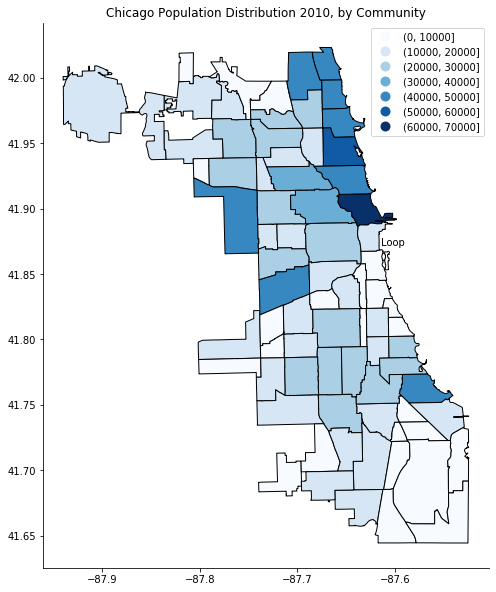

In [8]:
# Create population distribution map
fig, gax = plt.subplots(figsize=(8, 12))

# Add population distribution bins to map by specifying "column"
energy_chicago.plot(ax=gax, edgecolor='black', column='pop_bins', legend=True, cmap='Blues')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Including "Loop" label to establish geographical reference point
gax.annotate('Loop', xy=(-87.525, 41.84), xytext=(-87.525, 41.89), textcoords="offset points")

gax.set_title('Chicago Population Distribution 2010, by Community')

plt.show()

Further documentation can be found at: https://geopandas.org/